# Jupyter Notebook for Running `t2` on DELPHI

After downloading the `t2` dataset, this notebook can be run to perform one iteration of the training and detecting pipeline for the `t2` dataset. 

The plots generated in this notebook are used in:
-  **Figure 12** : examples of failed detection pipelines
-  **Appendix B** :  showing all failed detection pipelines.

To obtain other plots and results involving `t2`, such as the baseline results replicating the performance over different sizes of training image sets, please refer back to the `README.md` file and then navigate to `jobs/` to run it on **CSD3**.

## Important information to run this notebook:

It is assumed that both the `t1` and `t2` datasets have been downloaded and placed in the `data/` folder located in the parent directory of this package. Within `data/`, there should be two subfolders: `t1/` and `t2/`. Each of these should contain their respective `images/` and `annotations/` subfolders.

In [1]:
from DELPHI.LPdetection import LPPreprocess, LPtrain, LPDetect

### 1. Training 

This training process involves loading in the paths to the images and annotations, and running colour feature learning and spatial layout modelling. 

In [2]:
og_im = "./data/t2/images" #Just soft substrate
og_lp = "./data/t2/annotations"
LPPreprocess(impath=og_im, lppath=og_lp, train_ratio=0.8,seed=100) # train_ratio=0.7, seed = 100, output_dir= "../og_im" default
#stored under test_annotations, test_images, train_annotations, train_images

Duplicated annotations: []
Found 38 images
Found 98 annotations
Matched pairs: 38
Unmatched images: []
Unmatched annotations: ['0001', '0002', '0003', '0010', '0011', '0020', '0021', '0024', '0026', '0027', '0044', '0052', '0055', '0078', '0081', '0104', '0112', '0121', '0127', '0128', '0133', '0138', '0144', '0154', '0156', '0167', '0172', '0187', '0190', '0196', '0204', '0225', '0232', '0253', '0261', '0268', '0302', '0336', '0358', '0361', '0363', '0383', '0420', '0456', '0480', '0514', '0531', '0584', '0591', '0592', '0602', '0607', '0609', '0662', '0697', '0717', '0790', '0804', '0834', '0857']
Matched 38 pairs → 30 train, 0 validation, 8 test.


In [3]:
impath='./data/t2/train_images'
lppath='./data/t2/train_annotations'

In [4]:
train_dict=LPtrain(impath,lppath)

The selected images for this train set are: ['0926', '0333', '0956', '0315', '0455', '0178', '0310', '0734', '1185', '1139', '0828', '1124', '0459', '0148', '1224', '1195', '0188', '0859', '0816', '0231', '0738', '0555', '0470', '0494', '1023', '0282', '1134', '1208', '0700', '0266']


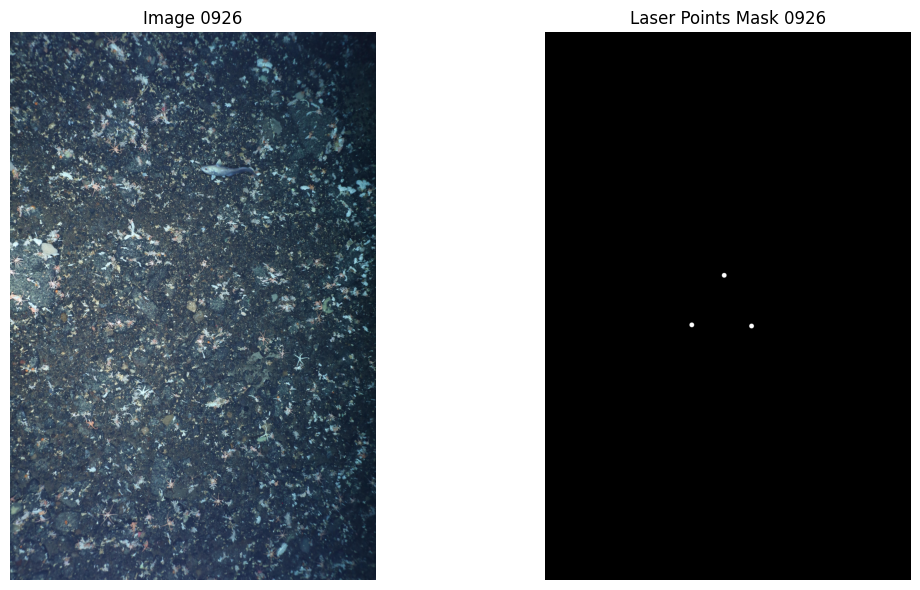

Laser Point Coordinates for Image 0926: [(1880, 2557), (1540, 3078), (2167, 3090)]


In [5]:
LPtrain.imgdisplay(train_dict,"0926") #assumption that the laser points are centered in the image


In [6]:
combined_mask = LPtrain.spatial_learning(train_dict,lpradius=25) 

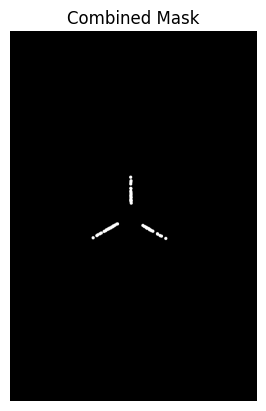

In [7]:
import matplotlib.pyplot as plt

plt.imshow(combined_mask, cmap='gray', vmin=0, vmax=1)
plt.title("Combined Mask")
plt.axis('off')
plt.savefig("./results/figures/4.8.7__t1combined_mask.png", dpi=300)
plt.show()


In [8]:
threshold, cluster_gamma, S_gamma, fig = LPtrain.color_learning(train_dict, lpradius = 3, backgroundradius = 25, plot = True)

### 2. Detection

This detection process involves using the parameters stored in the training process to predict laser points in the test images.

In [9]:
test_detector = LPDetect(
    impath='./data/t2/test_images',
    lppath='./data/t2/test_annotations',
    threshold=threshold,
    cluster_gamma=cluster_gamma,
    S_gamma=S_gamma,
    num_images= None
)

The selected images for this test set are: ['0381', '0942', '1220', '1011', '0458', '1106', '0853', '0590']


In [10]:
test_detector.gray_value_image(plot=True,save_path="./results/figures/4.8.5_t1greyimgvalue.png")

100%|██████████| 8/8 [07:52<00:00, 59.01s/it]


[SAVED] Grid plot saved to ./results/figures/4.8.5__t1greyimgvalue.png


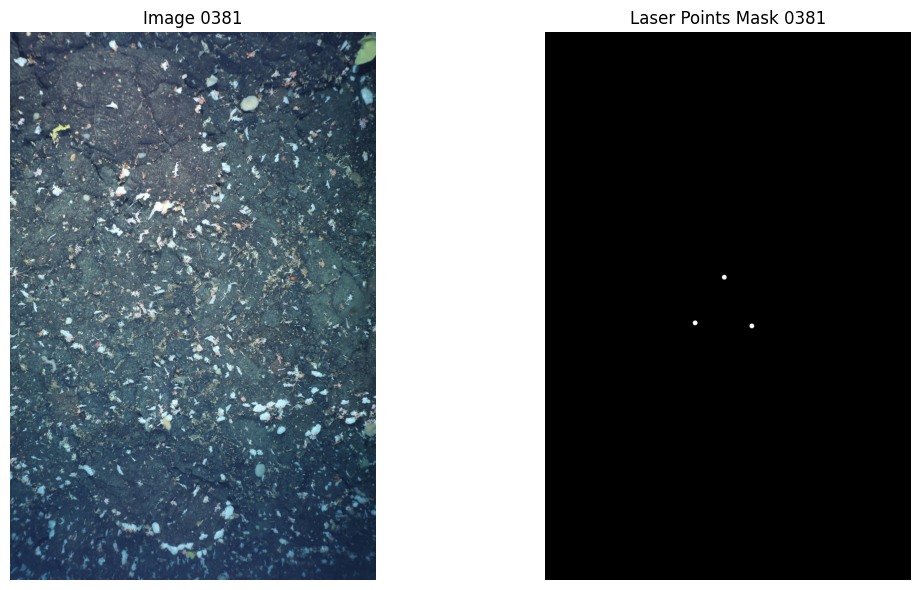

Laser Point Coordinates for Image 0381: [(1881, 2577), (1575, 3057), (2170, 3089)]


In [11]:
LPtrain.imgdisplay(test_detector,"0381") #assumption that the laser points are centered in the image

In [12]:
test_detector.binary_mask_image(plot=True,save_path="./results/figures/4.8.4_t1morphology.png")


[0381] Raw binary pixels before morphology: 74259
[0381] Binary pixels after morphology: 51429
[0942] Raw binary pixels before morphology: 258164
[0942] Binary pixels after morphology: 184308
[1220] Raw binary pixels before morphology: 335
[1220] Binary pixels after morphology: 72
[1011] Raw binary pixels before morphology: 232977
[1011] Binary pixels after morphology: 209820
[0458] Raw binary pixels before morphology: 659285
[0458] Binary pixels after morphology: 553528
[1106] Raw binary pixels before morphology: 987055
[1106] Binary pixels after morphology: 660112
[0853] Raw binary pixels before morphology: 712134
[0853] Binary pixels after morphology: 517442
[0590] Raw binary pixels before morphology: 154814
[0590] Binary pixels after morphology: 126183
[SAVED] Grid plot saved to ./results/figures/4.8.4_t1morphology.png


In [13]:
test_detector.apply_train_mask(combined_mask,save_path="./results/figures/4.8.3_t1mastermask.png") 

[SAVED] Grid plot saved to ./results/figures/4.8.3_t1mastermask.png


In [14]:
test_detector.connect_and_weight_regions(target_number_of_regions=5,plot=True,save_path="./results/figures/4.8.2_t1regionselection.png")


[0381] Connected regions found: 4
[0381] LP candidates found: 4
[0942] Connected regions found: 2
[0942] LP candidates found: 2
[1220] Connected regions found: 1
[1220] LP candidates found: 1
[1011] Connected regions found: 4
[1011] LP candidates found: 4
[0458] Connected regions found: 6
[0458] LP candidates found: 5
[1106] Connected regions found: 39
[1106] LP candidates found: 5
[0853] Connected regions found: 59
[0853] LP candidates found: 5
[0590] Connected regions found: 6
[0590] LP candidates found: 5
[SAVED] Grid plot saved to ./results/figures/4.8.2_t1regionselection.png


In [15]:
results = test_detector.predict_laserpoint(train_dict.image_dict)

[Warning] Not enough LP candidates for 0942 — storing raw candidates
[Warning] Not enough LP candidates for 1220 — storing raw candidates


In [16]:
precision, recall, f1, bad_ids = test_detector.performance_test()

ground truth and predicted points for 0381 is [(1881, 2577), (1575, 3057), (2170, 3089)] and [(2171, 3090), (1882, 2576), (1575, 3057)]
ground truth and predicted points for 0942 is [(1879, 2535), (1491, 3101), (2200, 3111)] and [(1494, 3105), (1879, 2535)]
ground truth and predicted points for 1220 is [(1882, 2634), (1622, 3027), (2102, 3047)] and [(1881, 2633)]
ground truth and predicted points for 1011 is [(1879, 2442), (1408, 3151), (2378, 3212)] and [(2318, 3192), (2287, 3185), (2305, 3184)]
ground truth and predicted points for 0458 is [(1879, 2555), (1521, 3091), (2209, 3115)] and [(2211, 3115), (1518, 3093), (1881, 2555)]
ground truth and predicted points for 1106 is [(1882, 2455), (1444, 3130), (2258, 3138)] and [(1444, 3130), (1882, 2455), (2163, 3112)]
ground truth and predicted points for 0853 is [(2399, 3222), (1325, 3199), (1877, 2286)] and [(1880, 2370), (1861, 2590), (2401, 3222)]
ground truth and predicted points for 0590 is [(1879, 2555), (1545, 3073), (2186, 3098)] a

In [17]:
test_dict = test_detector.image_dict
image_0196 = test_dict["0381"]["image"]
predicted_lp_0196 = test_dict["0381"]["predicted_laser_points"]
test_detector.visualize_overlay(image_0196, combined_mask, predicted_lp_0196, lpradius=30, title="0381 results",block_size=60, save_path="./results/figures/4.8.6_t1exampleresult.png")



[SAVED] Overlay visualization saved to ./results/figures/4.8.6_t1exampleresult.png


In [18]:
test_detector.visualise_failed_predictions(bad_ids, lpradius= 50,save_path="./results/figures/4.8.1_t1failedpred.png")


These test images failed to predict three laser points (5 total):
['0942', '1220', '1011', '1106', '0853']

